##### Elements of model in supervised learning. Inputs, weights, biases, outputs, targets.

In [10]:
import numpy as np # all relevant math functions
import matplotlib.pyplot as plt # nice graphs
from mpl_toolkits.mplot3d import Axes3D #nice 3d graphs

#### Generate random input data to train on

In [11]:
observations = 1000 # Try 10 million observations!
# np.random.uniform(low, high, size): draws a random value from the interval, where each number has an equal chance to be selected.

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# np.column_stack(tuples): takes a sequence of 1d arrays and stacks them into a single 2d array.

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


#### Create the targets

In [12]:
# targets = f(x,z) = 2*x - 3*z + 5 + noise (completely arbitrily chosen.)
# Conceptually, the algorithm must learn the above equation as a function
# Real data always has some noise

noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


#### Plotting the data

The point is to see that there is a strong trend that our model should learn to reproduce

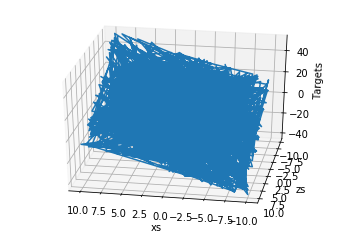

In [13]:
targets = targets.reshape(observations,)

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)
 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

#### Initialize the variables

In [14]:
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1
# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[ 0.05646241]
 [-0.03735081]]
[-0.05903311]


In [15]:
learning_rate = 0.02

In [16]:
# loss function, gradient descent
for i in range (200):
    
    # This is the linear model: y = xw + b equation
    # np.dot(a,b): used for multiplying matrices. Can also use a.dot(b)
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    # np.sum(a): method to sum all the values in the array.
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print (loss)
    deltas_scaled = deltas / observations
    
    # Finally, we must apply the gradient descent update rules.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

209.3455872478476
36.2863168503782
15.10220071619
12.144479383660201
11.389774519177896
10.915191399696567
10.489314976817317
10.083766641559338
9.694569550631718
9.320700014933045
8.961510557536608
8.616419492197114
8.284872815582911
7.966338851399241
7.660306860944278
7.366286159659501
7.083805322620357
6.812411427733601
6.551669329422209
6.301160960911342
6.060484663909863
5.82925454460216
5.6070998549165125
5.39366439807772
5.1886059574909265
4.991595748040826
4.802317888926589
4.620468897187186
4.445757201105085
4.277902672708103
4.116636178619842
3.9616991485385906
3.812843160652714
3.6698295433279253
3.5324289924276653
3.40042120365312
3.2735945193132956
3.151745588958854
3.034679043335542
2.922207181134452
2.8141496680368556
2.710333247571084
2.610591463317808
2.5147643920183547
2.422698387158128
2.3342458326139495
2.24926490597041
2.167619351125662
2.089178259822107
2.0138158617516564
1.9414113228990495
1.8718485517998875
1.8050160134027446
1.7408065502369026
1.679117210598980

#### Printing weights and biases

In [17]:
print (weights, biases)

[[ 1.99905493]
 [-3.00619757]] [4.93423688]


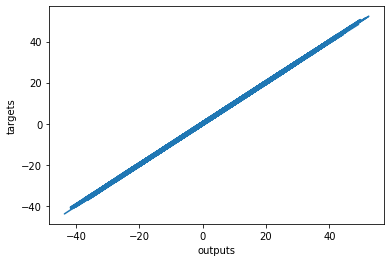

In [18]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()